In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/social-network-ads/Social_Network_Ads.csv


In [2]:
data = pd.read_csv("/kaggle/input/social-network-ads/Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [4]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

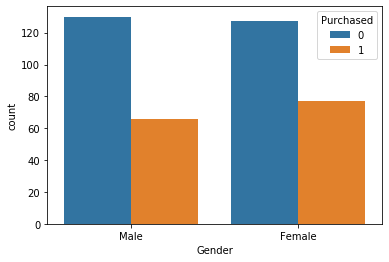

In [5]:
import seaborn as sns
sns.countplot(x="Gender", hue="Purchased", data=data)

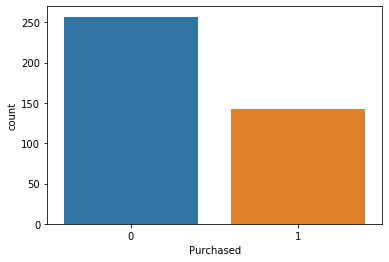

In [6]:
sns.countplot(x="Purchased", data=data)

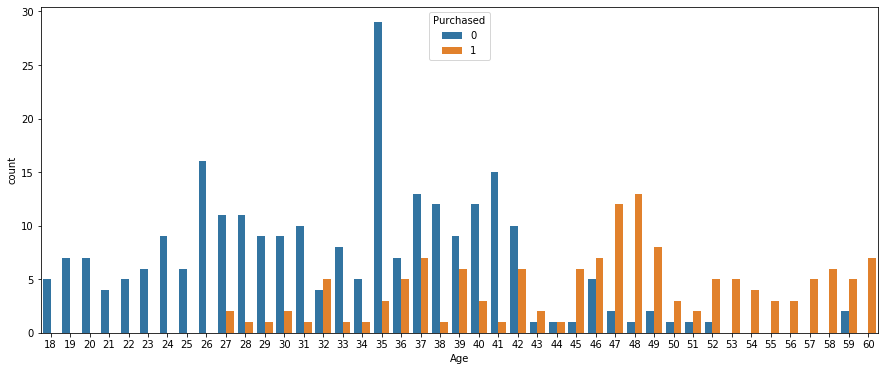

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
sns.countplot(x="Age", hue="Purchased", data=data.sort_values("Age"))

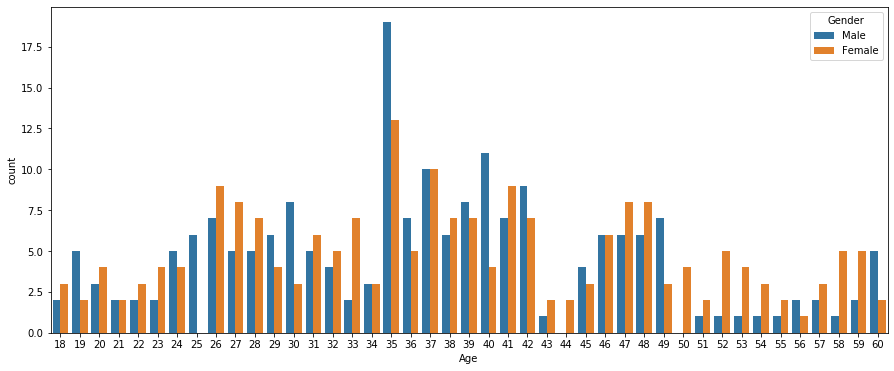

In [8]:
plt.figure(figsize=(15,6))
sns.countplot(x="Age", hue="Gender", data=data.sort_values("Age"))

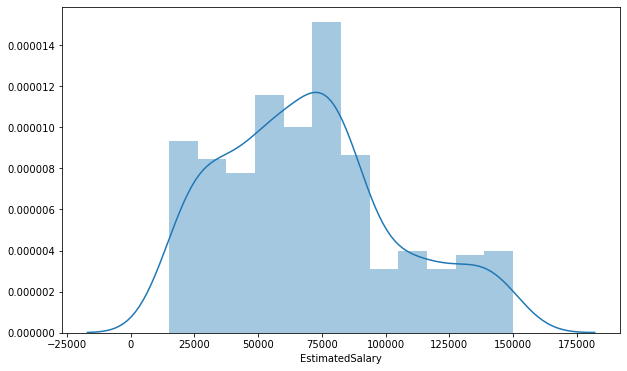

In [9]:
plt.figure(figsize=(10,6))
sns.distplot(data["EstimatedSalary"])

In [10]:
data["Gender"] = data["Gender"].apply(lambda x: 1 if x=="Male" else 0)
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [11]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X = data.drop(["User ID", "Purchased"], axis=1)
y = data["Purchased"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
classifier = GaussianNB()
classifier.fit(X_train, y_train)
prediction = classifier.predict(X_test)
acc = accuracy_score(y_test, prediction)
acc

0.8625

In [12]:
def will_buy(classifier, scaler, gender, age, salary):
    info = {"Gender":[gender], "Age": [age], "EstimatedSalary": [salary]}
    test = pd.DataFrame(info, columns=["Gender", "Age", "EstimatedSalary"])
    test = scaler.transform(test)
    pred = classifier.predict(test)
    return True if pred==[1] else False

In [13]:
will_buy(classifier, scaler, 1, 25, 50000)

False

In [14]:
will_buy(classifier, scaler, 0, 25, 150000)

True

In [15]:
will_buy(classifier, scaler, 1, 65, 50000)

True